In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# load datase
# col_names = ['studytime', 'failures', 'grade', 'address', 'Pstatus', 'Medu', 'Fedu', 
#              'traveltime', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 
#              'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health',
#              'adsences']
df = pd.read_csv("data/student_all.csv")
df.head(5)

studytime  failures  grade address Pstatus  Medu  Fedu  traveltime  \
0          2         0      0       U       A     4     4           2   
1          2         0      0       U       T     1     1           1   
2          2         0      1       U       T     1     1           1   
3          3         0      1       U       T     4     2           1   
4          2         0      1       U       T     3     3           1   

  schoolsup famsup  ... higher internet romantic famrel freetime  goout  Dalc  \
0       yes     no  ...    yes       no       no      4        3      4     1   
1        no    yes  ...    yes      yes       no      5        3      3     1   
2       yes     no  ...    yes      yes       no      4        3      2     2   
3        no    yes  ...    yes      yes      yes      3        2      2     1   
4        no    yes  ...    yes       no       no      4        3      2     1   

   health  absences  good_student  
0       3         4             0  
1       3         2             0  
2       3         6             1  
3       5         0             1  
4       5         0             1  

[5 rows x 22 columns]

In [28]:
#split dataset in features and target variable
feature_cols = ['studytime', 'failures', 'grade','goout','Medu', 'Fedu','freetime','Dalc', 'health']
# feature_cols = ['studytime', 'failures', 'grade']
X = df[feature_cols] # Features
y = df.good_student # Target variable


In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.958974358974359


In [7]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus

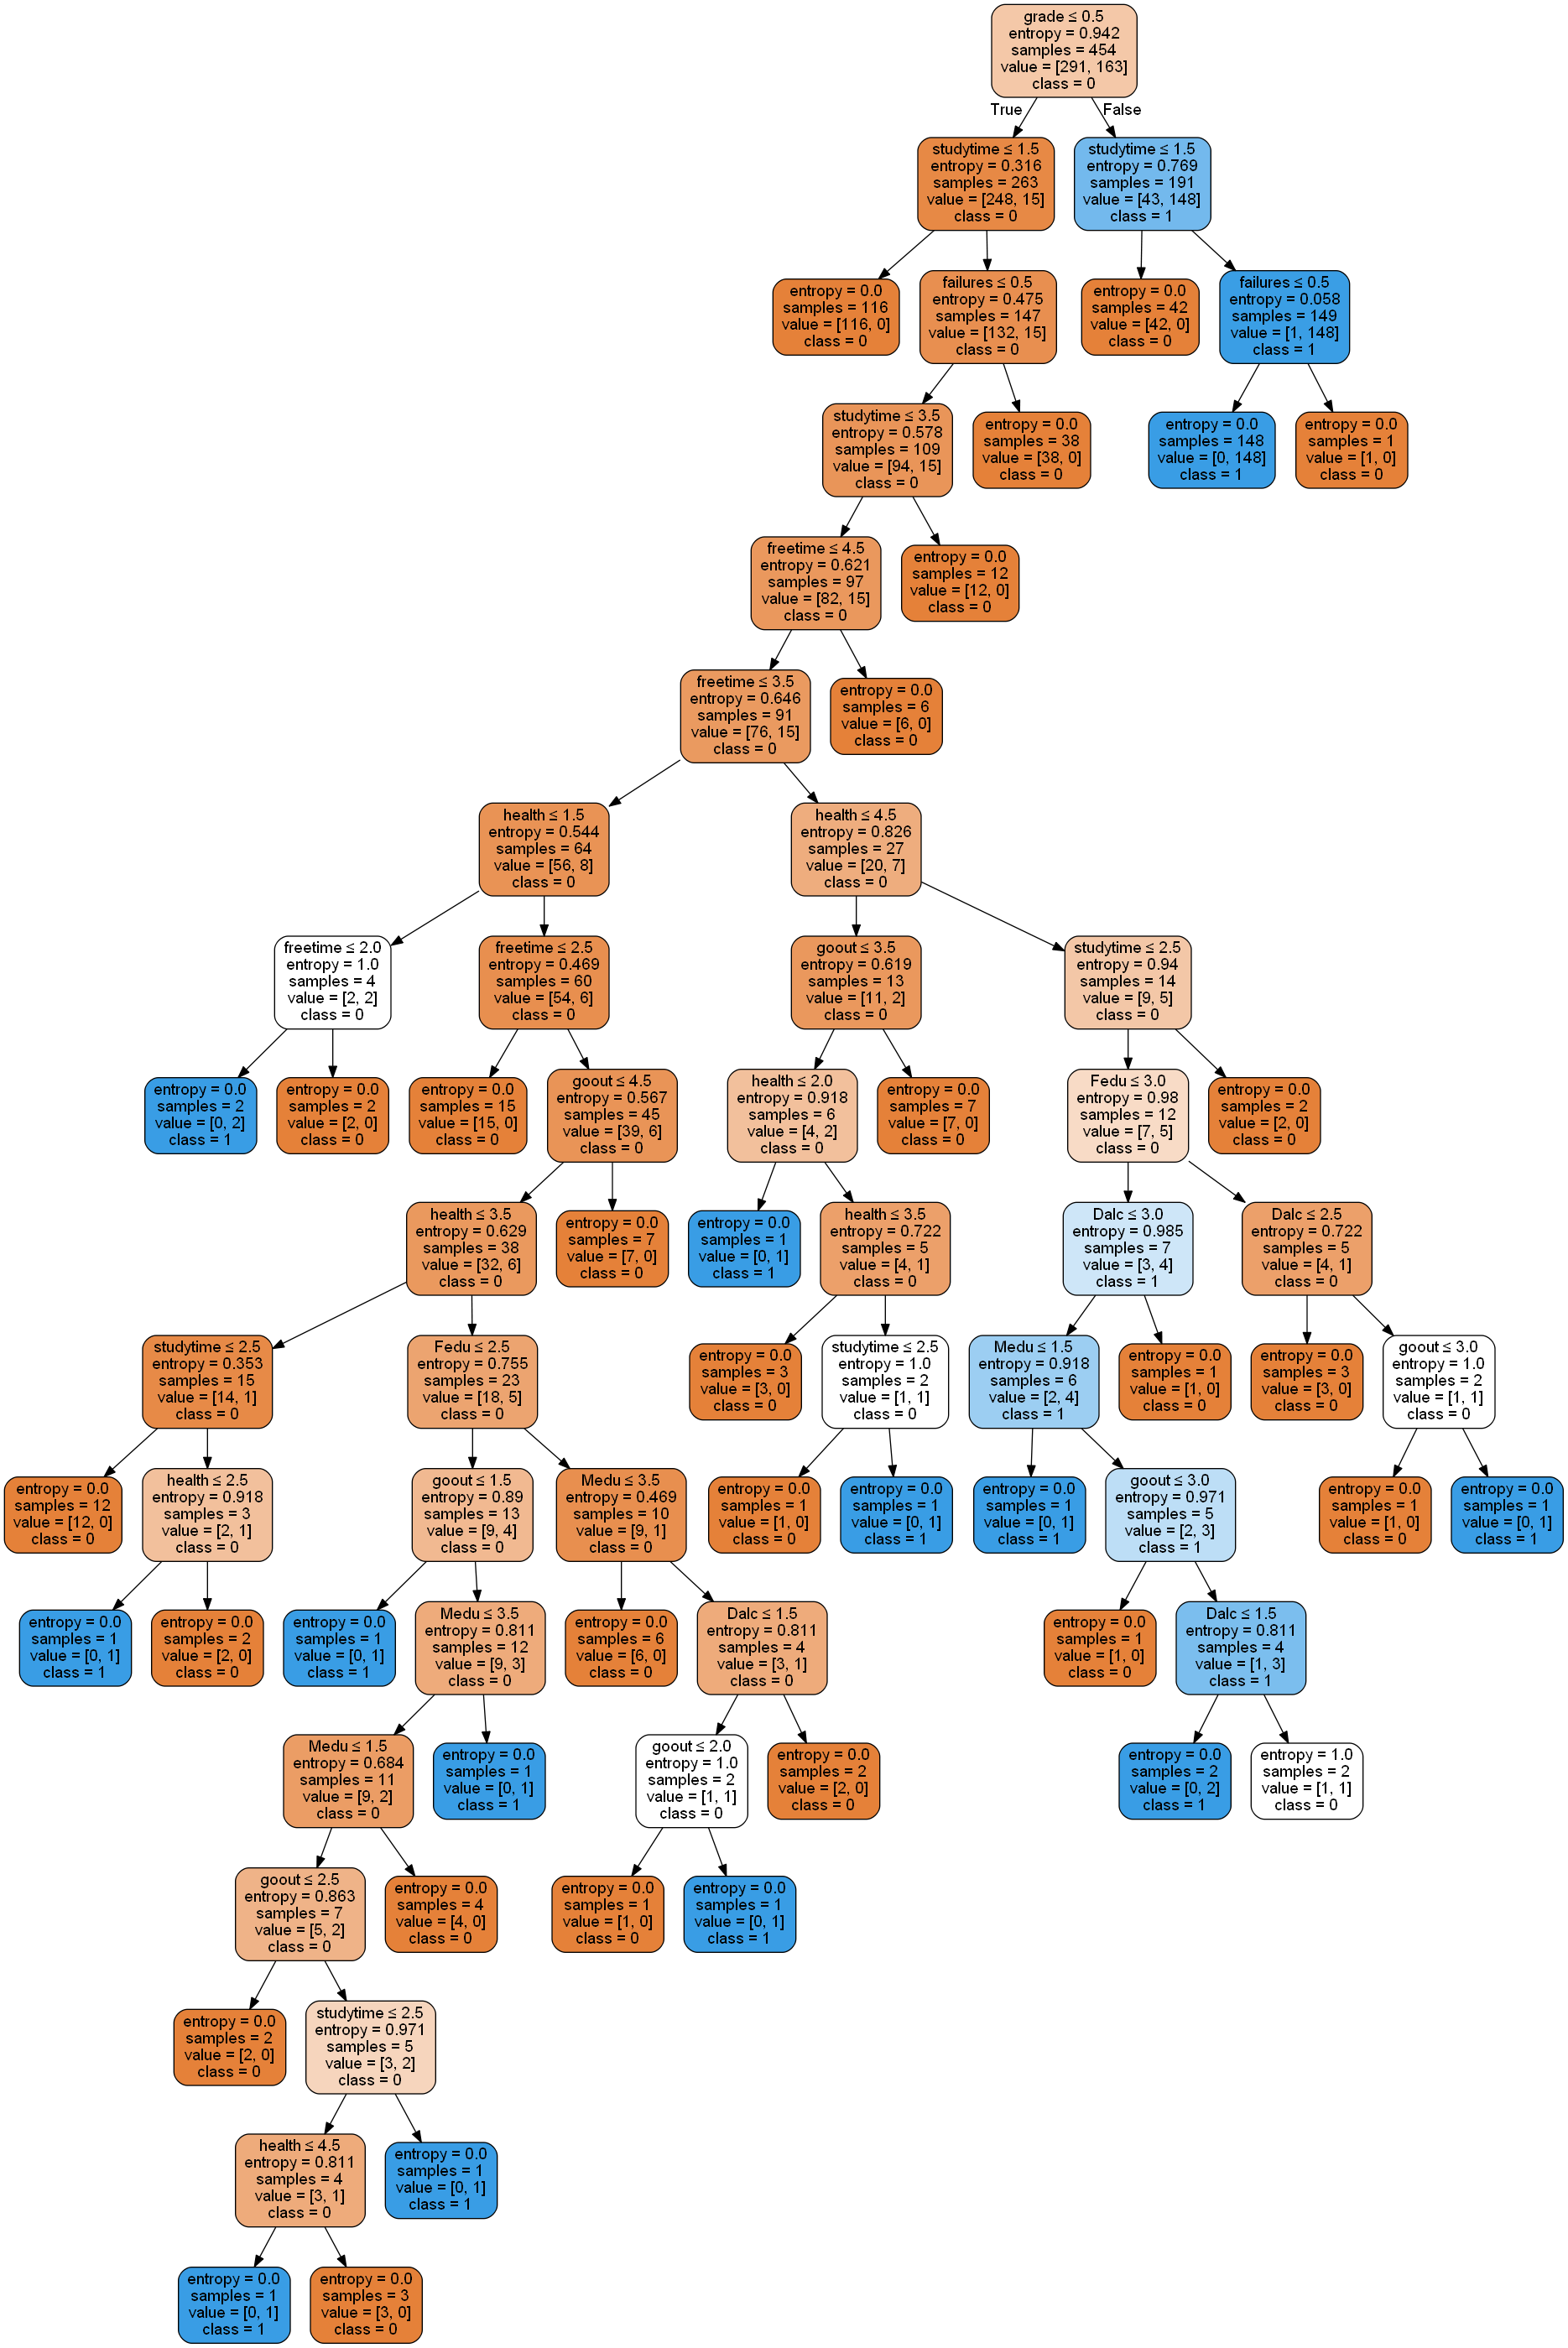

In [13]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#n_estimators代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train, y_train)

#預測測試組的駝背是否發生
rfc_pred = rfc.predict(X_test)

#利用confusion_matrix來看實際及預測的差異
# print(confusion_matrix(y_test,rfc_pred))

#利用classification_report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))
# print("Accuracy:",metrics.accuracy_score(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       120
           1       0.94      0.89      0.92        75

    accuracy                           0.94       195
   macro avg       0.94      0.93      0.93       195
weighted avg       0.94      0.94      0.94       195

